# Analyzing COVID-19 data

The notebook below has been created in a hurry, no guarantee at all. Doublecheck all computations etc. before 

The data is dynamically imported from https://raw.githubusercontent.com/CSSEGISandData

Read their terms of use! Last time I checked it, it is strictly for public use in academic or research purposes.

## Import data

In [104]:
import pandas as pd

raw_types = [ "Confirmed", "Recovered", "Deaths" ]

raw_urls = {}
raw_urls["Confirmed"] = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv"
raw_urls["Recovered"] = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv"
raw_urls["Deaths"] = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv"

raw_df = {}
for raw_type in raw_types:
    raw_df[raw_type] = pd.read_csv(raw_urls[raw_type])

Let's have a look which province/states and countries/regions are included. Only a part of the list is shown.

In [105]:
raw_df[raw_types[0]][~pd.notnull(raw_df[raw_types[0]]['Province/State'])]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,59,70,75,82,114,147,177,212,272,322
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,639,639,701,773,839,825,878,889,924,963
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,178,178,200,212,226,243,266,313,345,385
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,149,149,197,238,428,566,673,790,900,1030
9,NaN,Cambodia,11.5500,104.9167,0,0,0,0,0,1,...,3,3,5,7,7,7,33,35,37,51
10,NaN,Sri Lanka,7.0000,81.0000,0,0,0,0,0,1,...,2,2,6,10,18,28,44,51,60,73
11,NaN,Germany,51.0000,9.0000,0,0,0,0,0,1,...,1908,2078,3675,4585,5795,7272,9257,12327,15320,19848
12,NaN,Finland,64.0000,26.0000,0,0,0,0,0,0,...,59,59,155,225,244,277,321,336,400,450
13,NaN,United Arab Emirates,24.0000,54.0000,0,0,0,0,0,0,...,74,85,85,85,98,98,98,113,140,140


# Adaptation

Via the following list you can adapt which countries to be analyzed. 

Note: For some countries (e.g. China, United States), the input data is further decomposed into provinces/states. These countries are not yet supported here.

In [106]:
countries = [ 'Germany', 'Italy', 'India', 'Austria', 'Spain' ]

Check that all countries have accociated data.

In [107]:
remove_states = raw_df[raw_types[0]][~pd.notnull(raw_df[raw_types[0]]['Province/State'])]
for country in countries:    
    filtered = remove_states.loc[remove_states['Country/Region'].eq(country)]
    if (filtered.empty):
        raise ValueError("Country "+country+" not found in input data.")           

Special treatment of specific countries which are decomposed into provinces/states.

In [108]:
raw_df[raw_types[0]]

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,59,70,75,82,114,147,177,212,272,322
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,639,639,701,773,839,825,878,889,924,963
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,178,178,200,212,226,243,266,313,345,385
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,149,149,197,238,428,566,673,790,900,1030
5,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,39,46,64,64,73,103,103,186,231,271
6,New South Wales,Australia,-33.8688,151.2093,0,0,0,0,3,4,...,65,65,92,112,134,171,210,267,307,353
7,Victoria,Australia,-37.8136,144.9631,0,0,0,0,1,1,...,21,21,36,49,57,71,94,121,121,121
8,Queensland,Australia,-28.0167,153.4000,0,0,0,0,0,0,...,20,20,35,46,61,68,78,94,144,184
9,NaN,Cambodia,11.5500,104.9167,0,0,0,0,0,1,...,3,3,5,7,7,7,33,35,37,51


In [109]:
decomposed_countries = {}

# Use first 52 entries as list of states in US
us_states = raw_df[raw_types[0]][raw_df[raw_types[0]]['Country/Region']=='US'][:52]
decomposed_countries['US'] = us_states['Province/State'].tolist()

# decomposed_countries['US']
uk_states = raw_df[raw_types[0]][raw_df[raw_types[0]]['Country/Region']=='United Kingdom']
decomposed_countries['United Kingdom'] = uk_states['Province/State'].tolist()

## Convert Data

In [110]:
def extract_values(df, country):
    filtered = df[~pd.notnull(df['Province/State']) & df['Country/Region'].eq(country)]
    transposed = filtered.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1).transpose()
    values = transposed[transposed.columns[0]]
    return values

dates = raw_df[raw_types[0]].drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1).transpose().index.tolist()

# Get data for countries
all = {}
for country in countries:
    data = {}
    for raw_type in raw_types:
        values = extract_values(raw_df[raw_type], country)
        data[raw_type] = values
    all[country] = pd.DataFrame(data, index=dates)

In [111]:
def extract_values_with_region(df, country, region):
    filtered = df[df['Province/State'].eq(region) & df['Country/Region'].eq(country)]
    transposed = filtered.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1).transpose()
    values = transposed[transposed.columns[0]]
    return values

dates = raw_df[raw_types[0]].drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1).transpose().index.tolist()
ext_countries = countries

# Get data for states/regions with associated countries
for dcountry in decomposed_countries:
    sub = {}
    df1 = pd.DataFrame(data=0, index=dates, columns=raw_types)            
    first = True
    for region in decomposed_countries[dcountry]:
        data = {}
        for raw_type in raw_types:
            values = extract_values_with_region(raw_df[raw_type], dcountry, region)            
            df1[raw_type] = df1[raw_type] + values 
    all[dcountry] = df1
    ext_countries.append(dcountry)
    
all["US"].tail(15)

,Confirmed,Recovered,Deaths
3/6/20,45,0,0
3/7/20,66,0,0
3/8/20,66,0,0
3/9/20,66,0,0
3/10/20,959,8,28
3/11/20,1281,8,36
3/12/20,1663,12,40
3/13/20,2174,12,47
3/14/20,2717,12,54
3/15/20,3478,12,63


Show intermediate data.

## Enrich data

Enrich by computing Active = Confirmed - (Recovered + Deaths)

In [112]:
for country in ext_countries:
    all[country]["Active"] = all[country]["Confirmed"] - (all[country]["Recovered"] + all[country]["Deaths"])

raw_types_ext = raw_types.copy()
raw_types_ext.append("Active")

Enrich by computing the rate and moving average on rate.

In [122]:
window_size = 7

def addRate(df, label):
    df[label+" Rate"] = df[label].pct_change().replace(np.inf,0)
    
def addMovAverage(df, label, window_size):
    df[label+" Avg"] = df[label].rolling(window=window_size,center=False).mean()    
    #df[label+" Avg"] = df[label].ewm(com=0.1).mean()   

for country in ext_countries:
    for raw_type in raw_types_ext:
        addRate(all[country], raw_type)
        addMovAverage(all[country], raw_type+" Rate", window_size)

# Prediction

In [114]:
preview = 7

def predict(input_df, dimension):
    for raw_type in raw_types_ext:
        rate = input_df[dimension + " Rate Avg"]
        #diff = all[country]["Deaths Rate Avg"] - all[country]["Deaths Rate Avg"].shift(1)
        predict = input_df[dimension]
        for outlook in range(1,preview):
            predict = predict * (1+rate*0.9)
        input_df[dimension+" Predict"] = predict

for country in ext_countries:
    predict(all[country], "Confirmed")
    predict(all[country], "Deaths")


Show part of final data.

In [115]:
all["US"].tail(15)

,Confirmed,Recovered,Deaths,Active,Confirmed Rate,Confirmed Rate Avg,Recovered Rate,Recovered Rate Avg,Deaths Rate,Deaths Rate Avg,Active Rate,Active Rate Avg,Confirmed Predict,Deaths Predict
3/6/20,45,0,0,45,0.000000,0.000001,NaN,NaN,NaN,NaN,0.000000,0.000001,4.500034e+01,NaN
3/7/20,66,0,0,66,0.466667,0.424243,NaN,NaN,NaN,NaN,0.466667,0.424243,4.594620e+02,NaN
3/8/20,66,0,0,66,0.000000,0.038568,NaN,NaN,NaN,NaN,0.000000,0.038568,8.099491e+01,NaN
3/9/20,66,0,0,66,0.000000,0.003506,NaN,NaN,NaN,NaN,0.000000,0.003506,6.725949e+01,NaN
3/10/20,959,8,28,923,13.530303,12.300594,0.000000,0.000000,0.000000,0.000000,12.984848,11.804726,2.966045e+09,28.000000
3/11/20,1281,8,36,1237,0.335766,1.423478,0.000000,0.000000,0.285714,0.261905,0.340195,1.382425,1.804885e+05,128.177237
3/12/20,1663,12,40,1611,0.298205,0.400502,0.500000,0.454887,0.111111,0.124717,0.302344,0.400534,1.054366e+04,75.729053
3/13/20,2174,12,47,2115,0.307276,0.315751,0.000000,0.041325,0.175000,0.170432,0.312849,0.320820,9.750050e+03,110.650157
3/14/20,2717,12,54,2651,0.249770,0.255768,0.000000,0.003757,0.148936,0.150890,0.253428,0.259554,9.417289e+03,115.933158
3/15/20,3478,12,63,3403,0.280088,0.277877,0.000000,0.000342,0.166667,0.165232,0.283667,0.281475,1.327323e+04,144.744196


## Plot data

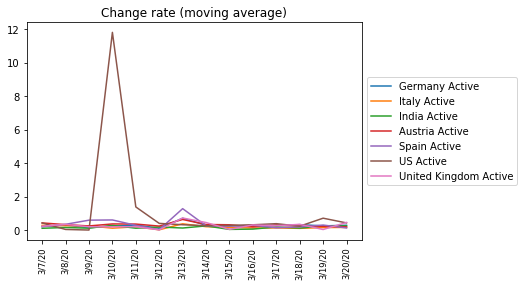

In [116]:
import matplotlib.pyplot as plt
import numpy as np

number_of_days = 14

for country in ext_countries:
    ts = all[country]["Active Rate Avg"].tail(number_of_days)
    pl = ts.plot(label=country+" Active")
    
    # Uncomment the following to add all lines in one figure
    #cl = plt.gca().lines[-1].get_color()    
    #ts = all[country]["Deaths Rate Avg"].tail(number_of_days)
    #ts.plot(label=country+" Deaths", linestyle='dashed', color=cl)

plt.title("Change rate (moving average)")
plt.xticks(np.arange(number_of_days), all[country].tail(number_of_days).index.tolist(), 
           fontsize='small', rotation='vertical')
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))


The y-axis shows the daily growth in percentage, e.g. 0.4 means that 40% more cases have been reported.

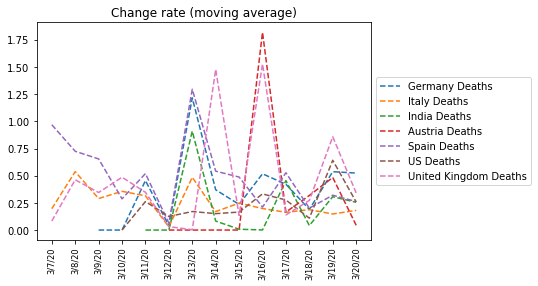

In [117]:
for country in ext_countries:
    ts = all[country]["Deaths Rate Avg"].tail(number_of_days)
    ts.plot(label=country+" Deaths", linestyle='dashed')
    
plt.title("Change rate (moving average)")
plt.xticks(np.arange(number_of_days), all[country].tail(number_of_days).index.tolist(), 
           fontsize='small', rotation='vertical')
    
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Diagram per Country

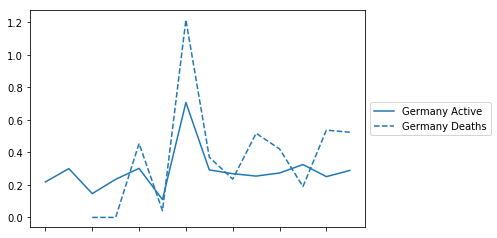

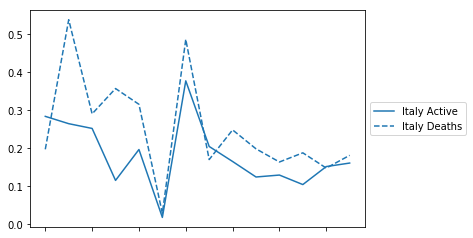

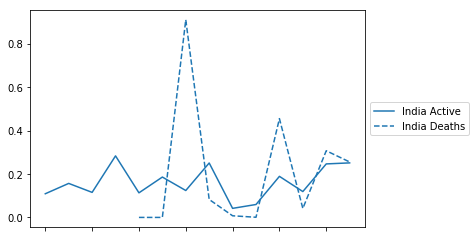

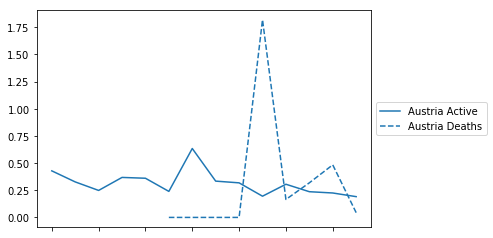

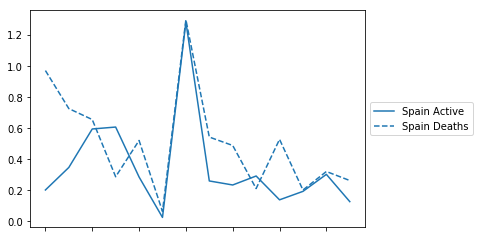

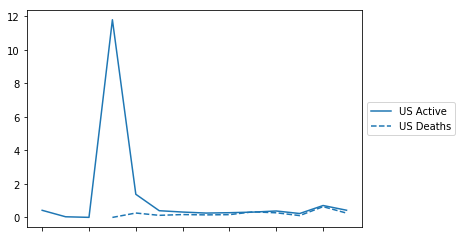

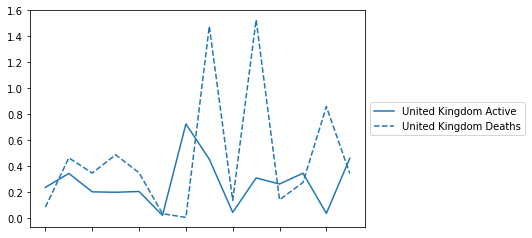

In [118]:
for country in ext_countries:
    ts = all[country]["Active Rate Avg"].tail(number_of_days)
    pl = ts.plot(label=country+" Active")
    
    # Get color of last plot
    cl = plt.gca().lines[-1].get_color()
    
    ts = all[country]["Deaths Rate Avg"].tail(number_of_days)
    ts.plot(label=country+" Deaths", linestyle='dashed', color=cl)

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.show()

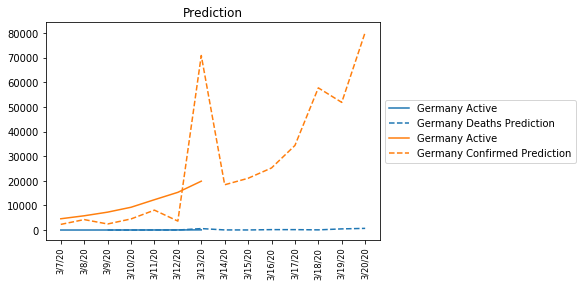

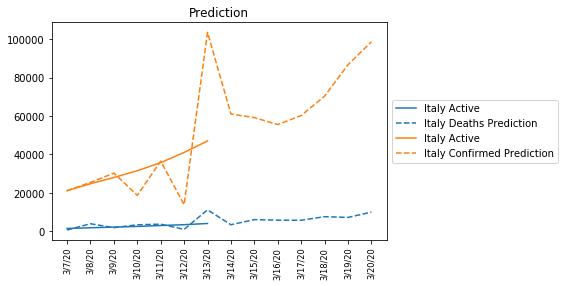

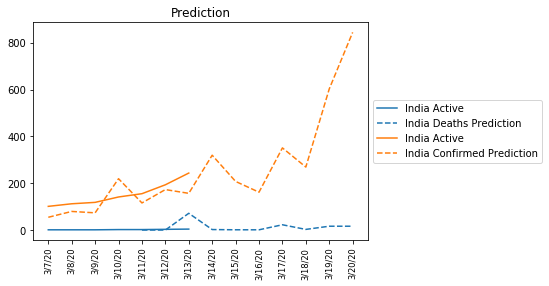

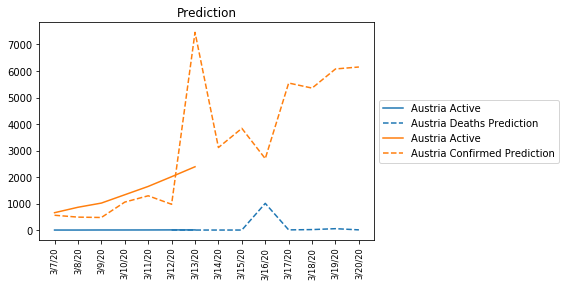

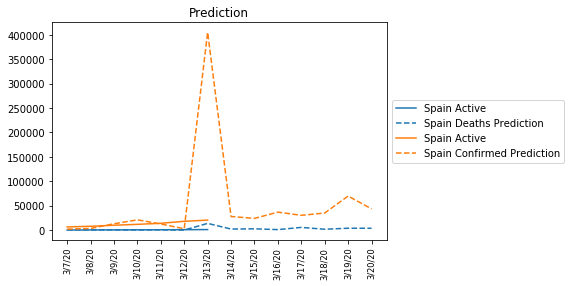

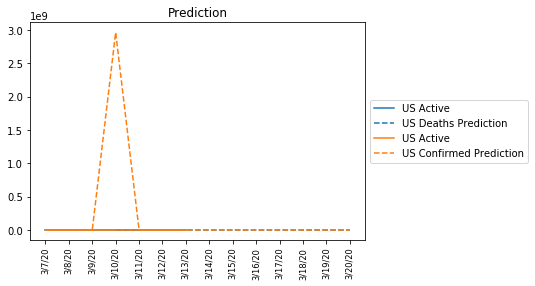

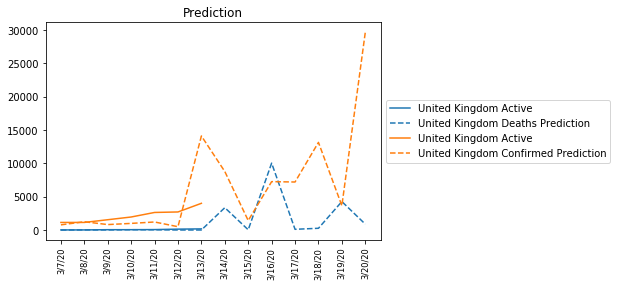

In [119]:
for country in ext_countries:
    ts = all[country]["Deaths"].shift(-preview).tail(number_of_days)
    pl = ts.plot(label=country+" Active")
    
    # Get color of last plot
    cl = plt.gca().lines[-1].get_color()
    
    ts = all[country]["Deaths Predict"].tail(number_of_days)
    ts.plot(label=country+" Deaths Prediction", linestyle='dashed', color=cl)

    ts = all[country]["Confirmed"].shift(-preview).tail(number_of_days)
    pl = ts.plot(label=country+" Active")
    
    # Get color of last plot
    cl = plt.gca().lines[-1].get_color()
    
    ts = all[country]["Confirmed Predict"].tail(number_of_days)
    ts.plot(label=country+" Confirmed Prediction", linestyle='dashed', color=cl)

    plt.title("Prediction")
    plt.xticks(np.arange(number_of_days), all[country].tail(number_of_days).index.tolist(), 
               fontsize='small', rotation='vertical')

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    plt.show()

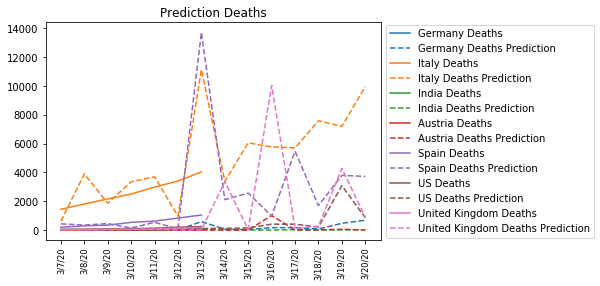

In [120]:
for country in ext_countries:
    ts = all[country]["Deaths"].shift(-preview).tail(number_of_days)
    pl = ts.plot(label=country+" Deaths")
    
    # Get color of last plot
    cl = plt.gca().lines[-1].get_color()
    
    ts = all[country]["Deaths Predict"].tail(number_of_days)
    ts.plot(label=country+" Deaths Prediction", linestyle='dashed', color=cl)

    plt.title("Prediction Deaths")
    plt.xticks(np.arange(number_of_days), all[country].tail(number_of_days).index.tolist(), 
               fontsize='small', rotation='vertical')

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
plt.show()

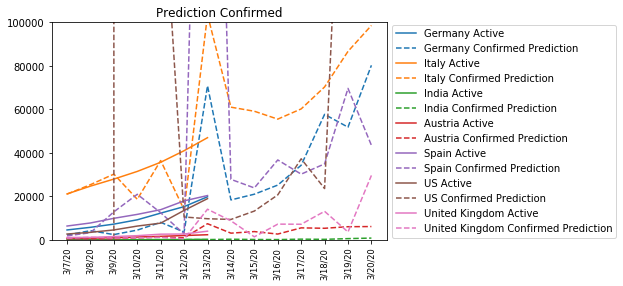

In [121]:
for country in ext_countries:
    ts = all[country]["Confirmed"].shift(-preview).tail(number_of_days)
    pl = ts.plot(label=country+" Active")
    
    # Get color of last plot
    cl = plt.gca().lines[-1].get_color()
    
    ts = all[country]["Confirmed Predict"].tail(number_of_days)
    ts.plot(label=country+" Confirmed Prediction", linestyle='dashed', color=cl)

    plt.title("Prediction Confirmed")
    plt.xticks(np.arange(number_of_days), all[country].tail(number_of_days).index.tolist(), 
               fontsize='small', rotation='vertical')

    axes = plt.gca()
    axes.set_ylim([0,100000])

    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
plt.show()